## Elements of a NLP model

#### The Natural Language Toolkit **nltk**

Import the following libraries by adding the following command in your Jupyter Notebook and run the cell. Feel free to follow along by creating your own Notebook and I have placed a copy in GitHub for reference:

In [2]:
import nltk

Next, we download the specific corpus we want to use. Alternatively you can download all the packages using the all parameter. If you are behind a firewall, there is an nltk.set_proxy option available. Check the documentation on nltk.org for more details:

In [3]:
nltk.download("names")

[nltk_data] Downloading package names to /Users/sphinx/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

We can use the following command to reference the corpus:

In [4]:
from nltk.corpus import names

In [9]:
names.words('male.txt')[-10:]

['Zed',
 'Zedekiah',
 'Zeke',
 'Zelig',
 'Zerk',
 'Zeus',
 'Zippy',
 'Zollie',
 'Zolly',
 'Zorro']

In [10]:
names.words('female.txt')[-10:]

['Zonnya',
 'Zora',
 'Zorah',
 'Zorana',
 'Zorina',
 'Zorine',
 'Zsa Zsa',
 'Zsazsa',
 'Zulema',
 'Zuzana']

To explore the data available in this corpus, lets run the print command against the two input sources which are male.txt and female.txt:

In [11]:
print("Count of Words in male.txt:", len(names.words('male.txt')))
print("Count of Words in female.txt:", len(names.words('female.txt')))

Count of Words in male.txt: 2943
Count of Words in female.txt: 5001


In [12]:
names.words('male.txt')[0:15]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim',
 'Abdullah',
 'Abe',
 'Abel',
 'Abelard',
 'Abner']

To see a list of the first few words found in each source, lets run the print command against the two input sources which are male.txt and female.txt:

In [15]:
print("Sample list Male names:", names.words('male.txt')[0:5])
print("Sample list Female names:", names.words('female.txt')[0:5])

Sample list Male names: ['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot']
Sample list Female names: ['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']


## Create a basic Prediction Output using NLTK

Create a gender_features function that returns the last letter of any inputted word. The model will use this classifier feature as input to predict the output which is based on the concept that first names that end the letters a, e and I are more likely to be female and first names ending in k, o, r, s or t are more likely to be male. There will be no output after you run the cell:

In [17]:
def gender_features(word):       
    return {'last_letter': word[-1]}

To confirm the function will return a value, enter the following command which prints the last character of any inputted name or word:

In [18]:
gender_features('Debra')

{'last_letter': 'a'}

Create a new variable named labeled_names that loops through both source gender files and assigns a name value pair each name so it can be identified as either male or female for input into the model. To see results after the loop has completed, we print the first few values to validate the labeled_names variable contains data:

In [19]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + 
                 [(name, 'female') for name in names.words('female.txt')])
print(labeled_names[0:5])

[('Aamir', 'male'), ('Aaron', 'male'), ('Abbey', 'male'), ('Abbie', 'male'), ('Abbot', 'male')]


Remember, the model should be trained using a random list of values to avoid any bias, therefore, we will input the random function and shuffle all the name and gender combinations which will change the sequence of how they are stored in the labeled_names variable. I added a print so you can see the difference between the output created in the prior step:

In [23]:
import random
random.shuffle(labeled_names)
print(labeled_names[0:3])

[('Carena', 'female'), ('Niven', 'male'), ('Minette', 'female')]


#### Adding meaningful features (gender_features)

Next we are going to train the model by creating **features** for each gender using the last letter from each name in the **labeled_names** variable. We print the new variable called featuresets so you can see how the feature will be used in the next step:

In [25]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
print(featuresets[0:3])

[({'last_letter': 'a'}, 'female'), ({'last_letter': 'n'}, 'male'), ({'last_letter': 'e'}, 'female')]


#### Data slicing

Next we are going to slice the data from the featureset variable list into two input data sets called train_set and test_set. 

Once we have those datasets separated, we can use the train_set as an input for the classifier. We use the len() function to give us a sense of the size of each data set:

In [29]:
train_set, test_set = featuresets[500:], featuresets[:500]
print("Count of features in Training Set:", len(train_set))
print("Count of features in Test Set:", len(test_set))

Count of features in Training Set: 7444
Count of features in Test Set: 500


#### Naïve Bayes Classifier

We will now pass the train_set variable as an input to the NLTK Naïve Bayes Classifier. 

The model is assigned the name classifier so you can call it like a function in the next step. There will be no output once you run the cell:

In [30]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

* Quick validation

We will now validate the results of the model by sending random names into the model using the following commands:

In [35]:
classifier.classify(gender_features('Sara'))

'male'

In [36]:
classifier.classify(gender_features('tom'))

'male'

In [24]:
classifier.classify(gender_features('Marc'))

'male'

In [34]:
classifier.classify(gender_features('Debra'))

'female'

In [39]:
classifier.classify(gender_features('Mohammad'))

'male'

In [41]:
classifier.classify(gender_features('Ibrahim'))

'male'

## Stop Words, Count words, Stemmer, Lemmatizer 



In [42]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt') # Punkt sentence tokenizer
nltk.download('brown') # The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University

#Check more details in https://www.nltk.org/book/ch02.html



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sphinx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sphinx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sphinx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /Users/sphinx/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [44]:

import nltk

from nltk.corpus import stopwords
from nltk.corpus import brown

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist # Probability model used to encode “frequency distributions”, which count the number of times that each outcome of an experiment occurs.

from nltk.stem import PorterStemmer  # Stemmers remove morphological affixes from words, leaving only the word stem.
from nltk.stem import WordNetLemmatizer # Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item

my_word_stemmer = PorterStemmer()
my_word_lemmatizer = WordNetLemmatizer()


* Lets count brown corpus and check it contains the 1M+ word

In [45]:

count_of_words = len(brown.words())
print('Count of all the words found the Brown Corpus =',format(count_of_words,',d'))


Count of all the words found the Brown Corpus = 1,161,192


In [46]:
brown.words()[-10:]

['the',
 'figure',
 'inside',
 'the',
 'coral-colored',
 'boucle',
 'dress',
 'was',
 'stupefying',
 '.']

* lets use FreqDist and pass the name of the text as an argument. We can inspect the total number of words ("outcomes") that have been counted up

In [50]:
input_data = FreqDist(brown.words()) #frequency distributions”, which count the number of times that each outcome of an experiment occurs

* Most common words: 

In [51]:
print(input_data.most_common(10))

[('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011)]


In [52]:
len(input_data)

56057

#### Tokenization
* TweetTokenizer
* word_tokenize

In [54]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
tt = TweetTokenizer()
input_data = "Seth and Becca love the playground.  When it's sunny, they head down there to play."
tweet = "This is a cooool #dummysmiley: :-). :-P <3 and some arrows < > -> <-- @remy: This is waaaaayyyy too much for you!!!!!!"
print(sent_tokenize(tweet))
print(word_tokenize(tweet))
print(tt.tokenize(tweet))


['This is a cooool #dummysmiley: :-).', ':-P <3 and some arrows < > -> <-- @remy: This is waaaaayyyy too much for you!!!!!', '!']
['This', 'is', 'a', 'cooool', '#', 'dummysmiley', ':', ':', '-', ')', '.', ':', '-P', '<', '3', 'and', 'some', 'arrows', '<', '>', '-', '>', '<', '--', '@', 'remy', ':', 'This', 'is', 'waaaaayyyy', 'too', 'much', 'for', 'you', '!', '!', '!', '!', '!', '!']
['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', '.', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--', '@remy', ':', 'This', 'is', 'waaaaayyyy', 'too', 'much', 'for', 'you', '!', '!', '!']


#### Stemmer and lematizer

* Stemming is the process of removing the last few characters of a given word, to obtain a shorter form, even if that form doesn't have any meaning.
* Lemmatization on the other hand, is the process of converting the given word into it's base form according to the dictionary meaning of the word.

In [65]:
# Stemmer 
print(my_word_stemmer.stem('fishing'))

# lemmatizer 

print(my_word_lemmatizer.lemmatize('fishing'))



fish
fishing


Lets have quick check.

In [66]:
my_list_of_words = brown.words()[:10]

for x in my_list_of_words :    
    print('word =', x, ': stem =', my_word_stemmer.stem(x), 
          ': lemma =', my_word_lemmatizer.lemmatize(x))

word = The : stem = the : lemma = The
word = Fulton : stem = fulton : lemma = Fulton
word = County : stem = counti : lemma = County
word = Grand : stem = grand : lemma = Grand
word = Jury : stem = juri : lemma = Jury
word = said : stem = said : lemma = said
word = Friday : stem = friday : lemma = Friday
word = an : stem = an : lemma = an
word = investigation : stem = investig : lemma = investigation
word = of : stem = of : lemma = of


## Sentiment analysis in action

#### Using Pre-trained VADER Models for NLTK Sentiment Analysis
Check full details on CodeProjects -> https://www.codeproject.com/Articles/5269445/Using-Pre-trained-VADER-Models-for-NLTK-Sentiment

Import the NLTK library and download the **vader_lexicon** library so all the functions and features will be available:

In [68]:
import nltk

In [69]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sphinx/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### SentimentIntensityAnalyze

Import the SentimentIntensityAnalyzer from the **NLTK Vader Library** for use in the next steps. There will be no output when you run the cell:

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

To make it easier, we will assign a variable object named my_ analyser and assign it to the SentimentIntensityAnalyzer() model. There will be no output after you run the cell:

In [7]:
my_analyzer = SentimentIntensityAnalyzer()

Next we will create a variable named **my_input_sentence** and assign it string value of I HATE my school. On the second line we will call the model and pass the variable as an argument to the polarity_scores() function:

In [18]:
my_input_sentence = "I LOVE my school!"
my_analyzer.polarity_scores(my_input_sentence)

{'compound': 0.7371, 'neg': 0.0, 'neu': 0.277, 'pos': 0.723}

We are going to import additional libraries to work with and analyze the results so include the following commands:

In [71]:
import pandas as pd
import numpy as np
%matplotlib inline

We also have to install a new library named twython so include the following command to install it in your Notebook session:

In [70]:
#!pip install twython #Actively maintained, pure Python wrapper for the Twitter API. Supports both normal and streaming Twitter APIs

If required, re-import the NLTK library and import the SentimentIntensityAnalyzer module. No output will be displayed after you run the cell:

In [72]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Define a variable as analyzer to easier reference later in the code. No output will be displayed after you run the cell:

In [73]:
analyzer = SentimentIntensityAnalyzer()

If required, re-download the NLTK vader_lexicon:

In [74]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sphinx/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Now we will read in the csv file using the pandas library and assign the result to a variable named sentences. To validate the results, you run the len() function:

In [76]:
URL='https://drive.google.com/uc?export=download&id=1OVnNj9IFF9fS5dJSRFYsqeo2C3vC8yUx'
sentences = pd.read_csv(URL)
len(sentences)

10

To preview the data and validate your DataFrame is loaded correctly, you can run a head() command:

In [77]:
sentences.head(10)

id                                               text
0   1                                I Hate my School!!!
1   2   @socialmediahandle I learned something new today
2   3           I need to take a cool trip to Austraila!
3   4                The restaurant service was amazing!
4   5                  I will never go back there again!
5   6  You learn something new every day - this place...
6   7  First Impressions - this is good but then it w...
7   8                                       A bit pricey
8   9                                          Love them
9  10                                                meh

The next block of code includes a few steps which 
* look through the DataFrame, 
* analyze the text source, 
* apply the VADER Sentiment metrics
* assign the results to a numpy array to easier usage. 

No output will be displayed after you run the cell:

In [78]:
i=0 #reset counter for loop

#initialize variables
my_vader_score_compound = [ ] 
my_vader_score_positive = [ ]  
my_vader_score_negative = [ ] 
my_vader_score_neutral = [ ] 

while (i<len(sentences)):

    my_analyzer = analyzer.polarity_scores(sentences.iloc[i]['text'])
    my_vader_score_compound.append(my_analyzer['compound'])
    my_vader_score_positive.append(my_analyzer['pos'])
    my_vader_score_negative.append(my_analyzer['neg'])    
    my_vader_score_neutral.append(my_analyzer['neu']) 
    
    i = i+1
    
#converting sentiment values to numpy for easier usage
my_vader_score_compound = np.array(my_vader_score_compound)
my_vader_score_positive = np.array(my_vader_score_positive)
my_vader_score_negative = np.array(my_vader_score_negative)
my_vader_score_neutral = np.array(my_vader_score_neutral)

Now we can extend the source DataFrame to include the results from the VADER Sentiment model. This will create four new columns and no output will be displayed after you run the cell:

In [79]:
sentences['my VADER Score'] = my_vader_score_compound
sentences['my VADER score - positive'] = my_vader_score_positive
sentences['my VADER score - negative'] = my_vader_score_negative
sentences['my VADER score - neutral'] = my_vader_score_neutral

To see the changes, we run the head() function again:

In [80]:
sentences.head(10)

id                                               text  my VADER Score  \
0   1                                I Hate my School!!!         -0.6784   
1   2   @socialmediahandle I learned something new today          0.0000   
2   3           I need to take a cool trip to Austraila!          0.3802   
3   4                The restaurant service was amazing!          0.6239   
4   5                  I will never go back there again!          0.0000   
5   6  You learn something new every day - this place...          0.6249   
6   7  First Impressions - this is good but then it w...          0.3400   
7   8                                       A bit pricey          0.0000   
8   9                                          Love them          0.6369   
9  10                                                meh         -0.0772   

   my VADER score - positive  my VADER score - negative  \
0                      0.000                      0.696   
1                      0.000                      0.000   
2                      0.302                      0.000   
3                      0.506                      0.000   
4                      0.000                      0.000   
5                      0.313                      0.000   
6                      0.254                      0.000   
7                      0.000                      0.000   
8                      0.808                      0.000   
9                      0.000                      1.000   

   my VADER score - neutral  
0                     0.304  
1                     1.000  
2                     0.698  
3                     0.494  
4                     1.000  
5                     0.687  
6                     0.746  
7                     1.000  
8                     0.192  
9                     0.000

While this information is useful, it still requires the user to scan through the results row by row. Let’s make it easier to analyze and summarize the results by creating a new column which categorizes the compound score results. No output will be displayed after you run the cell:

In [38]:
i=0 #reset counter for loop

#initialize variables
my_prediction = [ ] 

while (i<len(sentences)):
    if ((sentences.iloc[i]['my VADER Score'] >= 0.3)):
        my_prediction.append('positive')
    elif ((sentences.iloc[i]['my VADER Score'] >= 0) & (sentences.iloc[i]['my VADER Score'] < 0.3)):
        my_prediction.append('neutral')
    elif ((sentences.iloc[i]['my VADER Score'] < 0)):
        my_prediction.append('negative')     
    
    i = i+1

Similar to before, we will take the results and add a new column to our DataFrame called my prediction sentiment. No output will be displayed after you run the cell:

In [39]:
sentences['my predicted sentiment'] = my_prediction

To see the changes, we run the head() function again:

In [40]:
sentences.head(10)

id  ... my predicted sentiment
0   1  ...               negative
1   2  ...                neutral
2   3  ...               positive
3   4  ...               positive
4   5  ...                neutral
5   6  ...               positive
6   7  ...               positive
7   8  ...                neutral
8   9  ...               positive
9  10  ...               negative

[10 rows x 7 columns]

In [ ]:
sentences.groupby('my predicted sentiment').size().plot(kind='barh');

To make it easier to interpret the results, lets create a data visualization against the DataFrame by summarizing the results using an aggregate group by. We use the plot() function from the matplotlib library to display a horizontal bar chart:

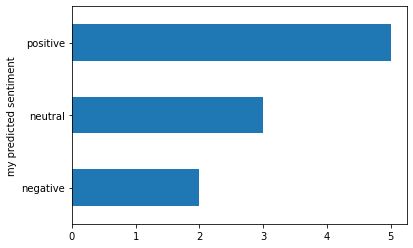

In [41]:
sentences.groupby('my predicted sentiment').size().plot(kind='barh');

#### Keywords and Libraries 
* Natural Language Toolkit (NLTK)
* TextBlob
* CoreNLP
* Gensim
* spaCy
* polyglot
* scikit–learn
* Pattern

Project example: https://sunscrapers.com/blog/8-best-python-natural-language-processing-nlp-libraries/

1- https://github.com/CullenBaker/BERT-Emotion-Classifier

2- https://github.com/NBrisbon/Silmarillion-NLP

3- https://github.com/ajayshewale/Sentiment-Analysis-of-Text-Data-Tweets-

4- https://github.com/zalandoresearch/fashion-mnist